In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('./customer_data_genv2.csv', encoding='utf-8')

In [3]:
df.columns

Index(['customer_id', 'customer_name', 'customer_surname', 'age', 'gender',
       'email', 'phone_number', 'monthlyIncome', 'educationLevel',
       'employmentType', 'birthCountryCode', 'cityCode', 'numberOfDependents',
       'householdMontlyIncome', 'primaryIdentificationNumber', 'employer',
       'krsScore', 'married', 'yearsInCurrentJob', 'creditHistory',
       'portfolioScore'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   customer_id                  200000 non-null  int64  
 1   customer_name                200000 non-null  object 
 2   customer_surname             200000 non-null  object 
 3   age                          200000 non-null  int64  
 4   gender                       200000 non-null  object 
 5   email                        200000 non-null  object 
 6   phone_number                 200000 non-null  int64  
 7   monthlyIncome                199672 non-null  float64
 8   educationLevel               200000 non-null  object 
 9   employmentType               200000 non-null  object 
 10  birthCountryCode             200000 non-null  object 
 11  cityCode                     200000 non-null  int64  
 12  numberOfDependents           200000 non-null  int64  
 13 

In [5]:
df.describe()

,customer_id,age,phone_number,monthlyIncome,cityCode,numberOfDependents,householdMontlyIncome,krsScore,yearsInCurrentJob,creditHistory,portfolioScore
count,200000.000000,200000.000000,2.000000e+05,199672.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000
mean,99999.500000,51.019930,9.050014e+11,5001.925969,35.213880,1.046045,1263.074000,1549.895875,5.500125,2.00087,1.993340
std,57735.171256,19.322718,2.884391e+09,4702.057918,20.525203,0.742306,2090.647884,202.168127,2.871202,1.41328,1.415615
min,0.000000,18.000000,9.000000e+11,0.000000,0.000000,0.000000,0.000000,1200.000000,1.000000,0.00000,0.000000
25%,49999.750000,34.000000,9.025067e+11,1873.000000,20.000000,0.000000,0.000000,1375.000000,3.000000,1.00000,1.000000
50%,99999.500000,51.000000,9.049999e+11,3991.000000,35.000000,1.000000,0.000000,1550.000000,6.000000,2.00000,2.000000
75%,149999.250000,68.000000,9.074986e+11,7030.000000,47.000000,2.000000,1503.000000,1726.000000,8.000000,3.00000,3.000000
max,199999.000000,84.000000,9.100000e+11,29996.000000,82.000000,2.000000,9999.000000,1899.000000,10.000000,4.00000,4.000000


In [6]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.columns

Index(['customer_name', 'customer_surname', 'gender', 'email',
       'educationLevel', 'employmentType', 'birthCountryCode',
       'primaryIdentificationNumber', 'employer', 'married'],
      dtype='object')

In [7]:
obj_df["gender"].value_counts()

Female    200000
Name: gender, dtype: int64

In [8]:
obj_df["educationLevel"].value_counts()

Bachelor       119833
High School     40055
Master          20081
Doctoral        10090
Primary          9941
Name: educationLevel, dtype: int64

In [9]:
obj_df["employmentType"].value_counts()

Full Time        74841
Unemployed       36494
Self Employed    27871
Casual           20034
Retired          18314
Part Time        11765
Student          10681
Name: employmentType, dtype: int64

In [10]:
obj_df["birthCountryCode"].value_counts()

TR    200000
Name: birthCountryCode, dtype: int64

In [11]:
obj_df["primaryIdentificationNumber"].value_counts()

-    200000
Name: primaryIdentificationNumber, dtype: int64

In [12]:
obj_df["employer"].value_counts()

-    200000
Name: employer, dtype: int64

In [14]:
# for now drop these columns gender,birthCountryCode,primaryIdentificationNumber,employer and married
# educationLevel and employmentType attributes will be converted into numerical

In [15]:
# convert two attribute to numerical values
temp_df = df.copy()
temp_df = pd.get_dummies(temp_df, columns=["educationLevel", "employmentType"], dtype='int64')

In [16]:
# drop the unnecessary columns
temp_df = temp_df.drop(["gender","birthCountryCode","primaryIdentificationNumber", "employer",
              "married","customer_name", "customer_surname","email","customer_id","phone_number"],
             axis=1)
temp_df.columns

Index(['age', 'monthlyIncome', 'cityCode', 'numberOfDependents',
       'householdMontlyIncome', 'krsScore', 'yearsInCurrentJob',
       'creditHistory', 'portfolioScore', 'educationLevel_Bachelor',
       'educationLevel_Doctoral', 'educationLevel_High School',
       'educationLevel_Master', 'educationLevel_Primary',
       'employmentType_Casual', 'employmentType_Full Time',
       'employmentType_Part Time', 'employmentType_Retired',
       'employmentType_Self Employed', 'employmentType_Student',
       'employmentType_Unemployed'],
      dtype='object')

In [17]:
# convert monthlyIncome attribute from float64 type to int64 type
temp_df = temp_df.fillna(0)
temp_df = temp_df.astype({"monthlyIncome": 'int64'})
#df["monthlyIncome"]

In [18]:
# try once with normalizing data and once not normalizing data
df_copy = temp_df.copy()

In [19]:
# Normalize the columns
# WE DIDN'T NORMALIZE COLUMNS BECAUSE IT AFFECTS THE PREDICTED RESULTS
# cols_to_norm = ["age","monthlyIncome","cityCode","numberOfDependents","householdMontlyIncome","krsScore","yearsInCurrentJob","creditHistory","portfolioScore"]
# df_copy[cols_to_norm] = temp_df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [20]:
# THERE ARE 3 DIFFERENT VERSION TO FIND THE BEST K VALUE

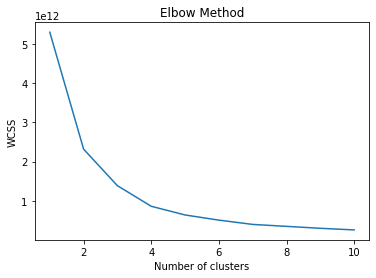

In [21]:
#VERSION 1
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(temp_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# K = 4

/home/yaren/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


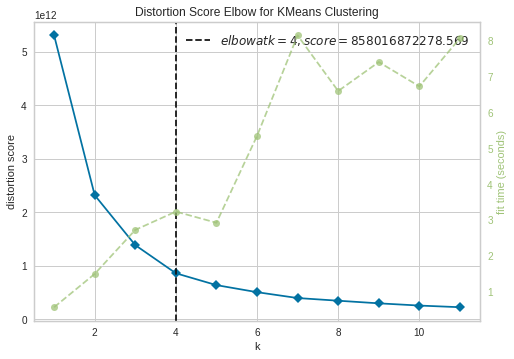

In [22]:
# VERSION 2
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(temp_df)        
visualizer.show()     

# K = 4

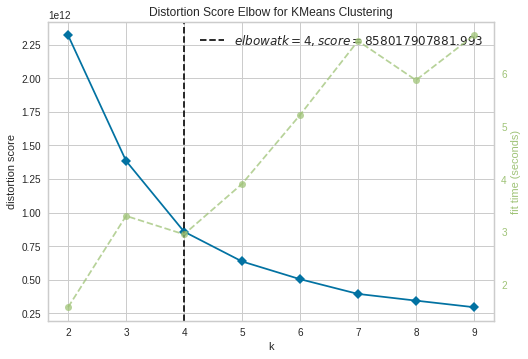

/home/yaren/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f98e8bdfd90>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

In [23]:
from yellowbrick.cluster.elbow import kelbow_visualizer

kelbow_visualizer(KMeans(random_state=4), temp_df, k=(2,10))

# K = 4

In [24]:
# AT THE END OF THE VERSIONS, 4 IS CHOOSEN AS THE BEST K VALUE

In [25]:
# K MEANS
kmeans = KMeans(n_clusters=4
                , init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit(temp_df)

In [26]:
# fit the df to the k means
# y_kmeans.cluster_centers_
y_kmeans.predict([[49,10513,35,2,5556,1389,6,2,2,0,0,0,1,0,0,0,0,1,0,0,0]]) #right predicted 1.line
y_kmeans.predict([[66,1702,78,2,0,1562,9,3,2,1,0,0,0,0,0,0,0,1,0,0,0]]) # right predicted 2.line
y_kmeans.predict([[40,5300,55,1,2331,1727,5,3,2,0,0,1,0,0,0,0,0,0,1,0,0]]) # right predicted 3.line
y_kmeans.labels_

# y_kmeans.inertia_
# y_kmeans.n_iter_

array([3, 2, 0, ..., 2, 2, 0], dtype=int32)

In [27]:
# save the model to use it whenever we want
from sklearn.externals import joblib
joblib.dump(kmeans, 'model.pkl')  
model_loaded = joblib.load('model.pkl')

/home/yaren/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [28]:
# concat the dataframe with the predicted clusters by k means
df_with_clusters = temp_df.copy()
df_with_clusters["cluster"] = pd.DataFrame(model_loaded.labels_)
# len(df[df["cluster"]==3])
df_with_clusters["cluster"].value_counts() # we have 4 clusters


2    93222
0    65475
3    35947
1     5356
Name: cluster, dtype: int64

In [29]:
# PREDICT THE CLUSTER OF THE POİNT
# SELECT ALL THE POINTS FROM THAT CLUSTER
a = [[49,10513,35,2,5556,1389,6,2,2,0,0,0,1,0,0,0,0,1,0,0,0]]
cluster_no = model_loaded.predict(a)[0]

df_selected_cluster_points = df_with_clusters[df_with_clusters["cluster"]==cluster_no]

In [30]:

# now find the closest point from df_selected_cluster_points to the our data point
from sklearn.metrics import pairwise_distances

pair_dist = pairwise_distances(df_selected_cluster_points.loc[:, df_selected_cluster_points.columns != 'cluster'],
                               a, metric='euclidean')
# closest, _ = pairwise_distances_argmin_min(model_loaded.cluster_centers_, a)
selected_id = pair_dist.argmin() # get the index of the min element

In [31]:
# get the selected customer from the df
df.loc[selected_id,:]

customer_id                                         0
customer_name                                   DAVUT
customer_surname                               HATICE
age                                                49
gender                                         Female
email                          DAVUT.HATICE@gmail.com
phone_number                             900448591943
monthlyIncome                                   10513
educationLevel                                 Master
employmentType                                Retired
birthCountryCode                                   TR
cityCode                                           35
numberOfDependents                                  2
householdMontlyIncome                            5556
primaryIdentificationNumber                         -
employer                                            -
krsScore                                         1389
married                                             l
yearsInCurrentJob           